In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels as sm
import statistics

In [2]:
data = pd.read_csv("E:\\8. INEURON\\2. September_batch\\2. Machine Learning\\3. ML datasets\\52. census income.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
data.shape

(32561, 15)

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Age 
### perform operation from age to income 

In [8]:
data['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

In [9]:
data['age'].unique()

array([90, 82, 66, 54, 41, 34, 38, 74, 68, 45, 52, 32, 51, 46, 57, 22, 37,
       29, 61, 21, 33, 49, 23, 59, 60, 63, 53, 44, 43, 71, 48, 73, 67, 40,
       50, 42, 39, 55, 47, 31, 58, 62, 36, 72, 78, 83, 26, 70, 27, 35, 81,
       65, 25, 28, 56, 69, 20, 30, 24, 64, 75, 19, 77, 80, 18, 17, 76, 79,
       88, 84, 85, 86, 87], dtype=int64)

In [10]:
len(data['age'].unique())

73

In [11]:
min(data['age'])

17

In [12]:
max(data['age'])

90

In [13]:
data['age'].isnull().sum()

0

In [14]:
# there is no any null value and all things are good 

In [15]:
data[data['age'] <= 25]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
18,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,?,>50K
25,21,Private,34310,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,2603,40,United-States,<=50K
30,23,Private,44064,Some-college,10,Separated,Other-service,Not-in-family,White,Male,0,2559,40,United-States,>50K
127,23,Private,162945,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,2377,40,United-States,<=50K
137,21,Private,377931,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2377,48,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32517,20,Private,270436,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
32530,22,Private,203715,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
32538,22,Private,325033,12th,8,Never-married,Protective-serv,Own-child,Black,Male,0,0,35,United-States,<=50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [16]:
data[data['age'] >= 25]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [17]:
# find the sex whose income is greater than 50k and age above 60 

data[(data['age'] >= 60) & (data['income']==">50K")]['sex'].value_counts()

Male      583
Female     69
Name: sex, dtype: int64

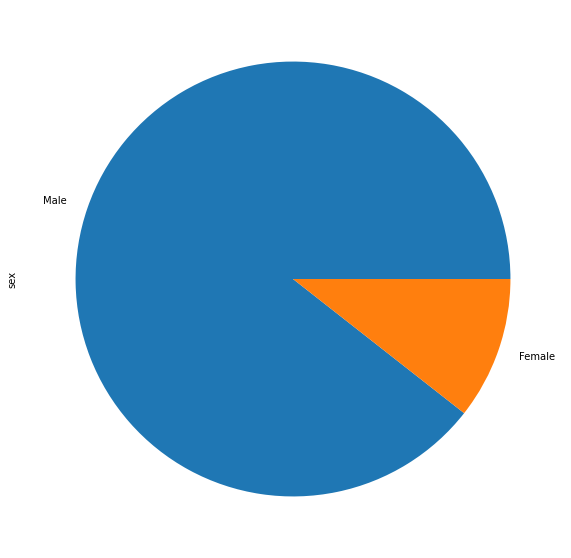

In [24]:
plt.figure(figsize=(15,10))
data[(data['age'] >= 60) & (data['income']==">50K")]['sex'].value_counts().plot.pie()
plt.show()

 # Data Cleaning

In [26]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


age :- there all things are set therfore no any chages to this column

workclass :- fixed with nan value

fnlwgt :- not importand column so we drop this 

eduction :- 

eduction_num :-

marital.status :-

occupation :-

relationship :-

race :-

sex :-

capital.loss :-

hour.per.week :-

native.country :-

income :-


In [27]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [28]:
df = data.copy()

In [29]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [31]:
df['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [33]:
df[df["workclass"] == "?"]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [35]:
# In this work class there are question mark we can change it by NaN 

df["workclass"]=df["workclass"].str.replace("?",str(np.nan))

C:\Users\PCLP\AppData\Local\Temp\ipykernel_3040\296905750.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["workclass"]=df["workclass"].str.replace("?",str(np.nan))


In [38]:
df["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
nan                  1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [39]:
df[df["workclass"]=='Never-worked']

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8874,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
13675,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
17089,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
21934,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
24483,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
32331,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
32338,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


<AxesSubplot:ylabel='workclass'>

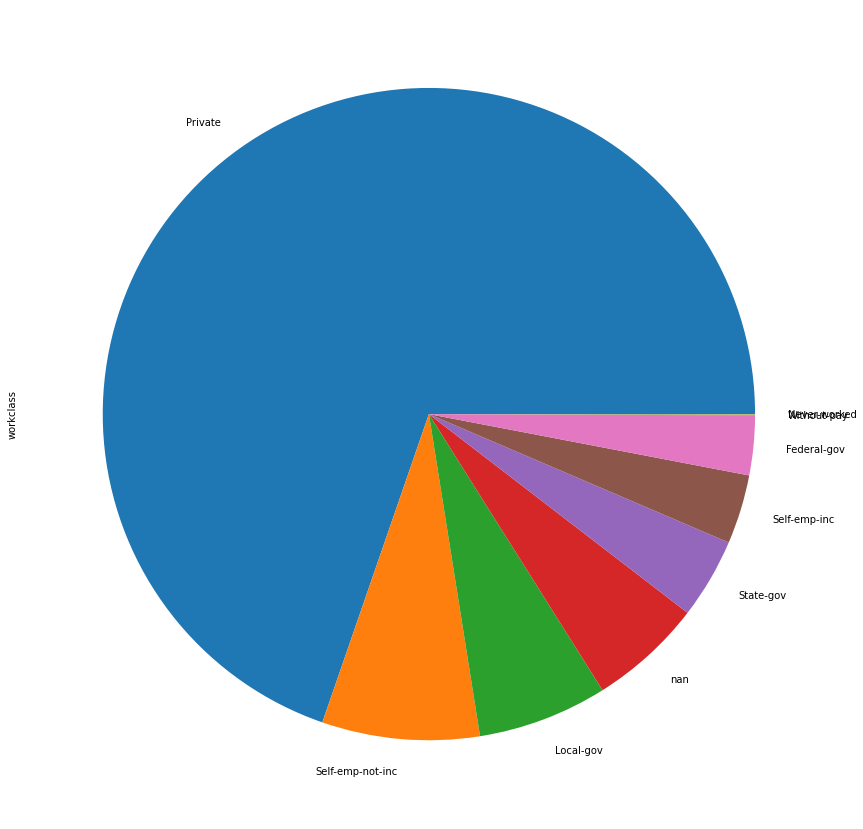

In [41]:
plt.figure(figsize=(20,15))
df["workclass"].value_counts().plot.pie()

## Eduction

In [45]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,nan,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,nan,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [47]:
df['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [48]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [51]:
df['education'].isna().sum()

0

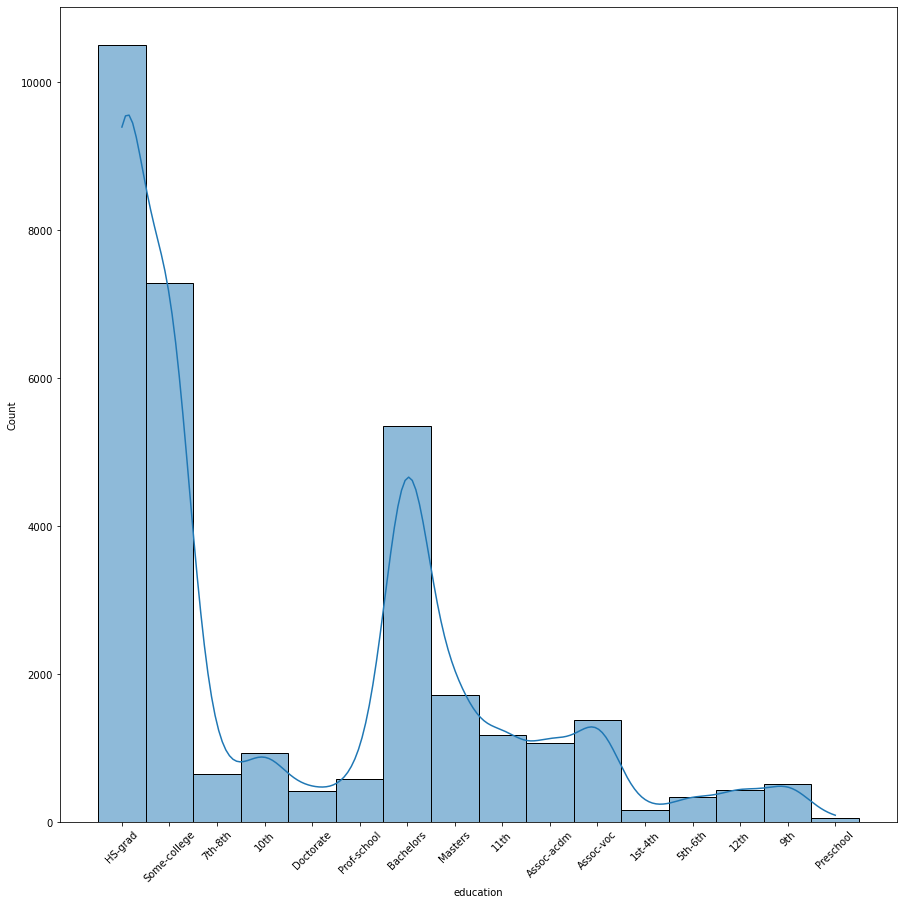

In [57]:
plt.figure(figsize=(15,15))
sns.histplot(data=df['education'],kde=True)
plt.xticks(rotation=45)
plt.show()

In [61]:
# count whoes age is more than 75 and whoes education is HS-grad

df[(df["age"] >= 75) & (df["education"] == "HS-grad")]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,nan,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
128,81,Private,177408,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2377,26,United-States,>50K
199,90,Private,51744,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,United-States,<=50K
2299,90,Private,175491,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,9386,0,50,Ecuador,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31566,87,nan,90338,HS-grad,9,Widowed,?,Not-in-family,White,Male,0,0,2,United-States,<=50K
31799,90,nan,313986,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,>50K
31939,82,Self-emp-not-inc,71438,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,20,United-States,<=50K
32305,90,Private,313749,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,25,United-States,<=50K


In [64]:
df['education.num'].value_counts().sort_index()

1        51
2       168
3       333
4       646
5       514
6       933
7      1175
8       433
9     10501
10     7291
11     1382
12     1067
13     5355
14     1723
15      576
16      413
Name: education.num, dtype: int64

In [72]:
df['education'].value_counts().sort_values(ascending=True)

Preschool          51
1st-4th           168
5th-6th           333
Doctorate         413
12th              433
9th               514
Prof-school       576
7th-8th           646
10th              933
Assoc-acdm       1067
11th             1175
Assoc-voc        1382
Masters          1723
Bachelors        5355
Some-college     7291
HS-grad         10501
Name: education, dtype: int64

In [81]:
df.groupby('education')['education.num'].value_counts().sort_values()

education     education.num
Preschool     1                   51
1st-4th       2                  168
5th-6th       3                  333
Doctorate     16                 413
12th          8                  433
9th           5                  514
Prof-school   15                 576
7th-8th       4                  646
10th          6                  933
Assoc-acdm    12                1067
11th          7                 1175
Assoc-voc     11                1382
Masters       14                1723
Bachelors     13                5355
Some-college  10                7291
HS-grad       9                10501
Name: education.num, dtype: int64

# marital.status

In [83]:
df['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [84]:
df['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [88]:
def cust(x):
    if x == "Married-civ-spouse" or x == "Married-spouse-absent" or x == "Married-AF-spouse" :
        return "Married"
    elif x == "Never-married":
        return "UnMarried"
    elif x == "Separated" or x == "Divorced":
        return "Divorced"
    elif x == "Widowed":
        return "Widowed"

In [93]:
df['marital.status'] = df['marital.status'].apply(cust)

In [94]:
df['marital.status'].value_counts()

Married      15417
UnMarried    10683
Divorced      5468
Widowed        993
Name: marital.status, dtype: int64

## occupation

In [96]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,nan,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,nan,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Divorced,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [98]:
df['occupation'].unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [99]:
df['occupation'].isna().sum()

0

In [100]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

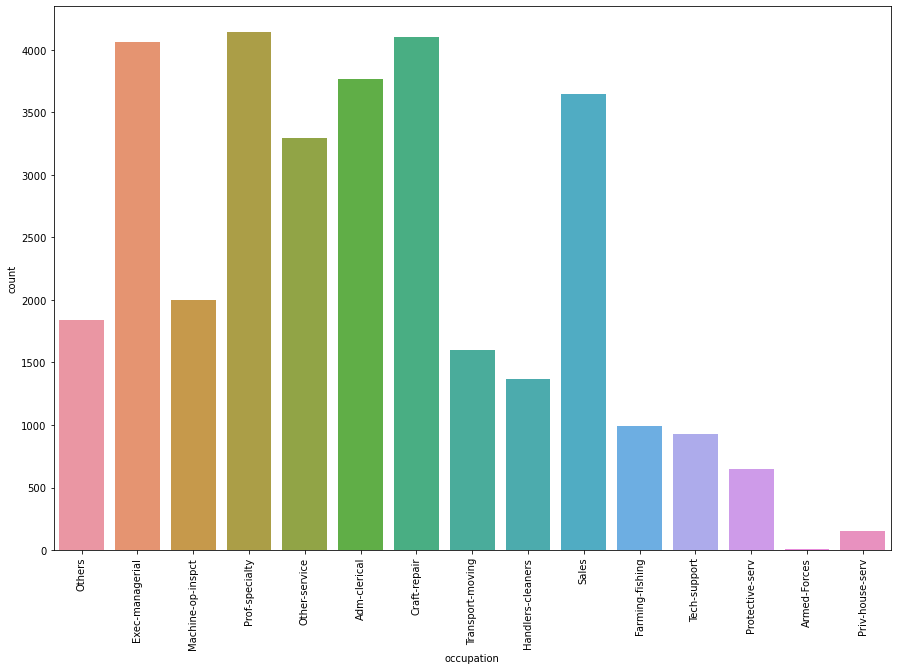

In [162]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['occupation'])
plt.xticks(rotation=90)
plt.show()

In [102]:
df[(df['occupation'] == "?") & df["age"]]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
14,51,nan,172175,Doctorate,16,UnMarried,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,nan,135285,HS-grad,9,Married,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,nan,100820,HS-grad,9,Married,?,Husband,White,Male,0,2489,15,United-States,<=50K
49,67,nan,174995,Some-college,10,Married,?,Husband,White,Male,0,2457,40,United-States,<=50K
76,41,nan,27187,Assoc-voc,11,Married,?,Husband,White,Male,0,2415,12,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32483,49,nan,114648,12th,8,Divorced,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
32528,81,nan,120478,Assoc-voc,11,Divorced,?,Unmarried,White,Female,0,0,1,?,<=50K
32533,35,nan,320084,Bachelors,13,Married,?,Wife,White,Female,0,0,55,United-States,>50K
32541,71,nan,287372,Doctorate,16,Married,?,Husband,White,Male,0,0,10,United-States,>50K


In [111]:
df[(df['occupation'] == "?") & (df["workclass"] == "nan")]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,nan,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,nan,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,nan,172175,Doctorate,16,UnMarried,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,nan,135285,HS-grad,9,Married,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,nan,100820,HS-grad,9,Married,?,Husband,White,Male,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,nan,320084,Bachelors,13,Married,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,nan,33811,Bachelors,13,UnMarried,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,nan,287372,Doctorate,16,Married,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,nan,202822,HS-grad,9,Divorced,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [105]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
nan                  1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

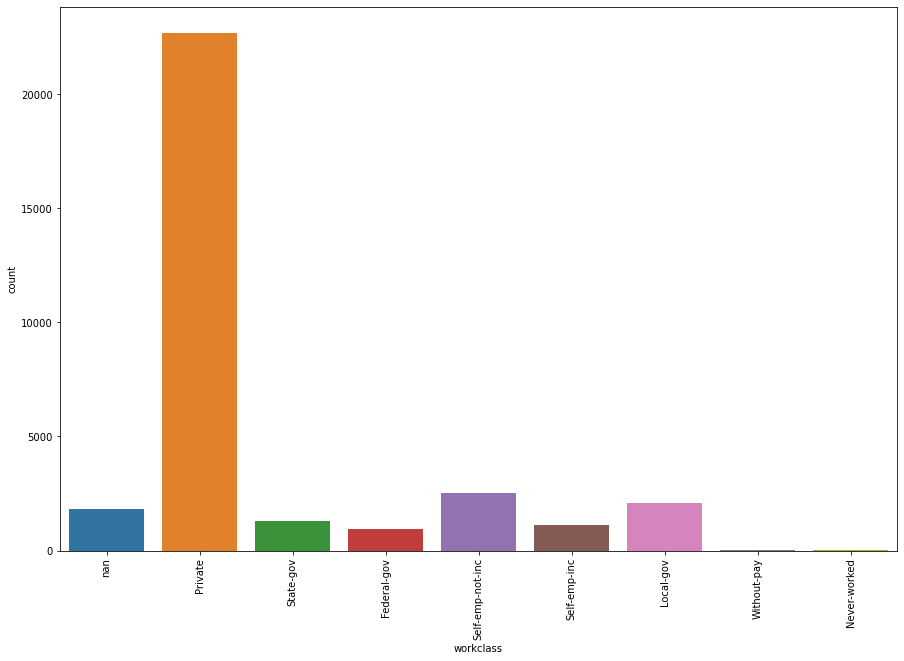

In [161]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['workclass'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:ylabel='workclass'>

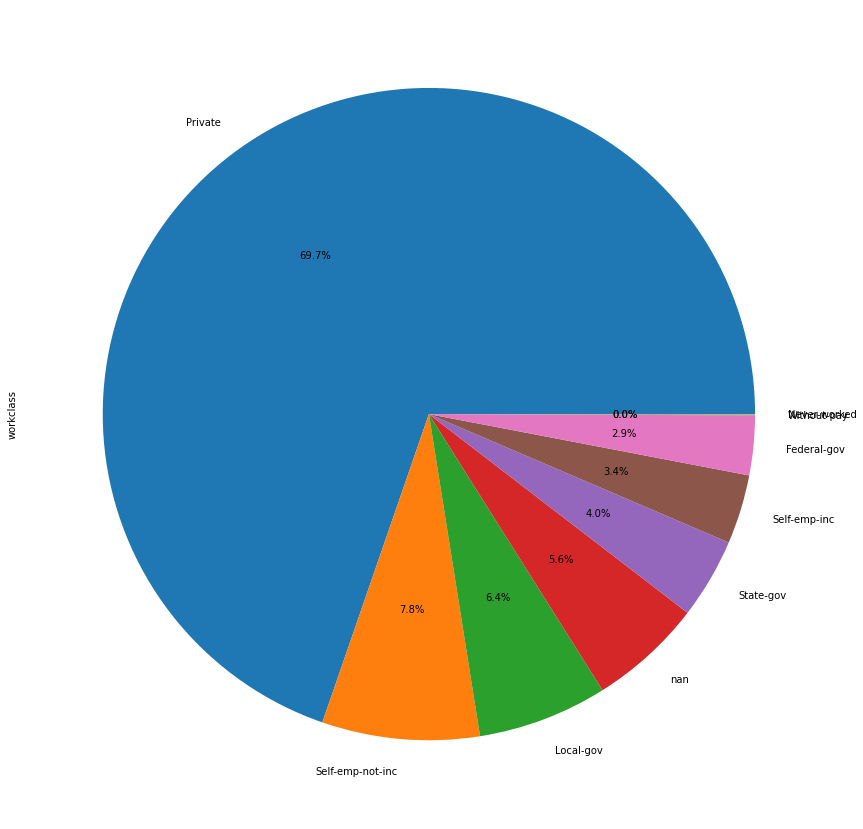

In [163]:
df['workclass'].value_counts().plot.pie(y=df['workclass'],figsize=(15,15),autopct="%1.1f%%")

In [117]:
df['workclass']

0            nan
1        Private
2            nan
3        Private
4        Private
          ...   
32556    Private
32557    Private
32558    Private
32559    Private
32560    Private
Name: workclass, Length: 32561, dtype: object

In [118]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,nan,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,nan,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Divorced,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [120]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [123]:
df[(df['occupation'] == "?") & (df["workclass"] == "nan")]['relationship'].value_counts()

Own-child         538
Husband           489
Not-in-family     439
Unmarried         175
Wife              132
Other-relative     63
Name: relationship, dtype: int64

In [126]:
df['occupation'] = df['occupation'].str.replace("?","Others")

C:\Users\PCLP\AppData\Local\Temp\ipykernel_3040\68590555.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['occupation'] = df['occupation'].str.replace("?","Others")


In [129]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Others               1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [131]:
df['relationship'].isna().sum()

0

In [132]:
df['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [133]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [134]:
df['race'].isna().sum()

0

In [135]:
df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

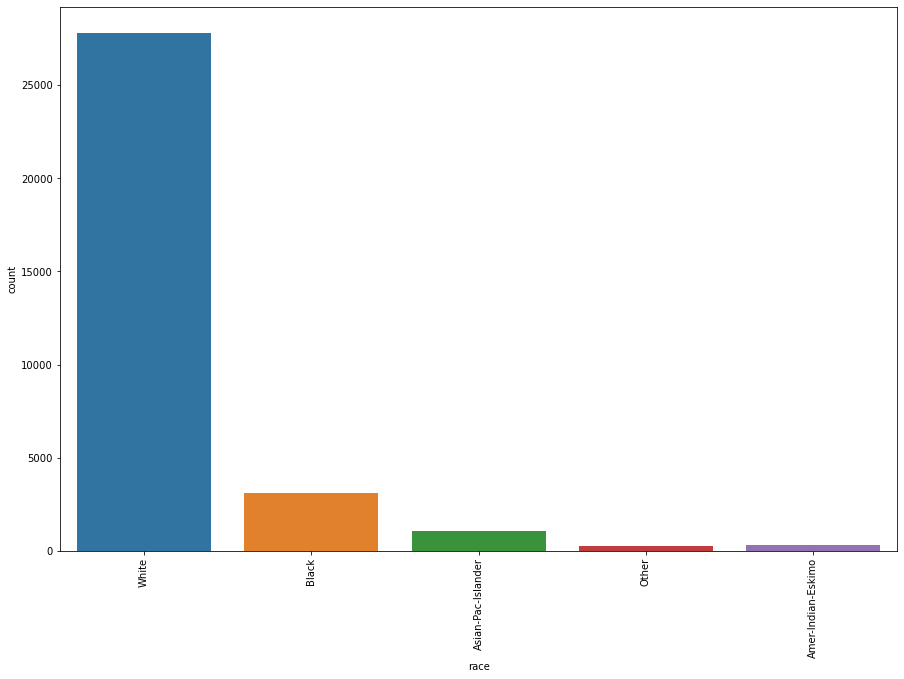

In [160]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['race'])
plt.xticks(rotation=90)
plt.show()

In [139]:
df[(df['race'].value_counts())&(df['income'] == ">50k")]

C:\Users\PCLP\AppData\Local\Temp\ipykernel_3040\2353894816.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[(df['race'].value_counts())&(df['income'] == ">50k")]


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


In [143]:
df['capital.gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
4931         1
7978         1
5060         1
2538         1
Name: capital.gain, Length: 119, dtype: int64

In [144]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,nan,77053,HS-grad,9,Widowed,Others,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,nan,186061,Some-college,10,Widowed,Others,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Divorced,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [148]:
# whoes capital gain is high male or female

df[(df["capital.gain"]==max(df["capital.gain"])) & (df['sex']=='Male')][0:50]


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1519,54,Self-emp-inc,166459,Prof-school,15,Married,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
1520,52,Private,152234,HS-grad,9,Married,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,>50K
1521,53,Self-emp-inc,263925,HS-grad,9,Married,Sales,Husband,White,Male,99999,0,40,United-States,>50K
1522,52,Private,118025,Bachelors,13,Married,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K
1523,46,Private,370119,Prof-school,15,Married,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
1524,43,Private,176270,Bachelors,13,Married,Exec-managerial,Husband,White,Male,99999,0,60,United-States,>50K
1526,50,Private,171338,Some-college,10,Married,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K
1528,43,Self-emp-inc,172826,Some-college,10,Married,Sales,Husband,White,Male,99999,0,55,United-States,>50K
1529,65,Self-emp-inc,139272,Bachelors,13,Married,Sales,Husband,White,Male,99999,0,60,United-States,>50K
1530,26,Private,256000,Prof-school,15,Married,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K


In [152]:
# find the min age whose capital gain is maximum

df[(df['capital.gain'] == max(df['capital.gain'])) & (df['age'] <= 21)]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1570,21,Private,334618,Some-college,10,UnMarried,Protective-serv,Not-in-family,Black,Female,99999,0,40,United-States,>50K


In [166]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

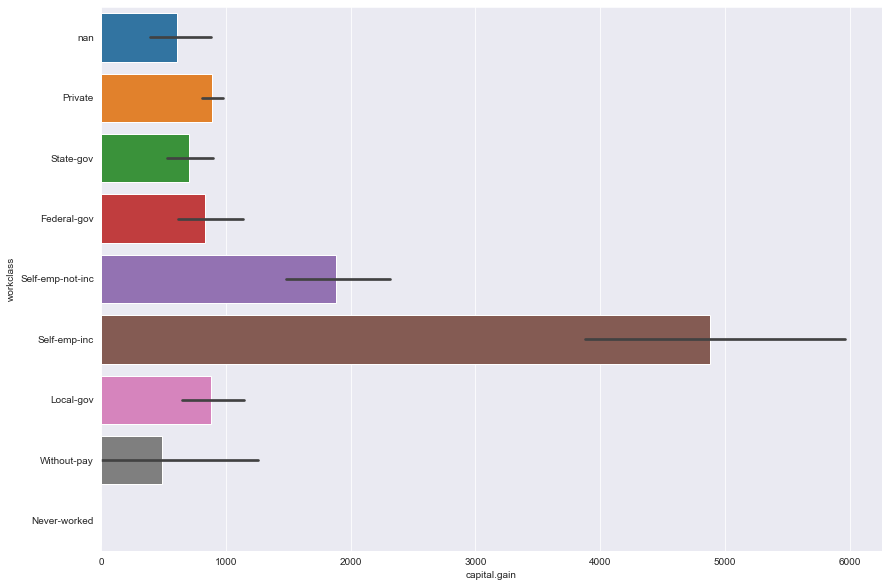

In [169]:
plt.figure(figsize=(14,10))
sns.set_style("darkgrid")
plt.xlabel("capital.gain and workclass")
plt.ylabel("axis of workclass")
sns.barplot(x='capital.gain',y='workclass',data=df)
sns.set_theme()

In [170]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,nan,77053,HS-grad,9,Widowed,Others,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,nan,186061,Some-college,10,Widowed,Others,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Divorced,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [180]:
def changes(x):
    if x == "<=50K":
        return "50000"
    elif x == ">50k":
        return "50000"
    elif x == 'None':
        return "0"

In [181]:

df['income']=df['income'].apply(changes)

In [174]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,nan,77053,HS-grad,9,Widowed,Others,Not-in-family,White,Female,0,4356,40,United-States,50000
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,50000
2,66,nan,186061,Some-college,10,Widowed,Others,Unmarried,Black,Female,0,4356,40,United-States,50000
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,50000
4,41,Private,264663,Some-college,10,Divorced,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,50000


In [175]:
df['income'].value_counts()

50000    24720
Name: income, dtype: int64